In [1]:
import tensorflow as tf
print('done')
import pandas as pd
import requests
import shutil
import matplotlib
from matplotlib import image
from matplotlib import pyplot
from PIL import Image, ImageColor
import numpy as np
import urllib
from sklearn.model_selection import train_test_split
import cv2
from sklearn.cluster import KMeans
import webcolors
from webcolors import rgb_to_name

done


In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split

In [3]:
path = '/Users/anaghabalaji/Desktop/approved_products.csv'

In [4]:
df = pd.read_csv(path, names = ['name', 'tags', 'image_url'], skiprows = [0, 1])

In [5]:
df.head()

,name,tags,image_url
0,Pink Bridal Bouquet,{},https://weddings-products.s3.amazonaws.com/pro...
1,Rose Boutonniere,{},https://weddings-products.s3.amazonaws.com/pro...
2,Flower Clusters,{},https://weddings-products.s3.amazonaws.com/pro...
3,Large Flower Cloud,{},https://weddings-products.s3.amazonaws.com/pro...
4,Greenery Bud Vase Trio,{},https://weddings-products.s3.amazonaws.com/pro...


In [6]:
df.columns

Index(['name', 'tags', 'image_url'], dtype='object')

In [7]:
tag = df.loc[10].at['tags']
print(tag)

{meta_priceType_ITEM,meta_stemsRegular_18,meta_stemsGreenery_3,meta_stemsPremium_3,meta_stemsFourDollar_0,color_blush,color_cream,color_green,color_peach,color_white,flower_gardenRose,flower_greenery,flower_ranunculus,style_garden,season_spring,season_summer,season_yearround,occasion_cocktail,occasion_reception,itemType_centerpiece,meta_productCatalogJan2021,meta_productPriced,meta_displayPriceUnit_}


In [8]:
def convert_tag(tag):
    split_tag = tag.split(',')
    intermediate = []
    for item in split_tag:
        removed = item.replace('"', "")
        removed_3 = removed.replace('{', '')
        removed_4 = removed_3.replace('}', '')
        intermediate.append(removed_4)
    return intermediate

In [9]:
df.loc[97].at['image_url']

'https://poppy-customer-content-prod.s3.amazonaws.com/2021/10/05/nf0542288-8271-49f6-9f02-b90052ae5d9b-Greenery-Aisle-Decor.png'

In [10]:
convert_tag(tag)

['meta_priceType_ITEM',
 'meta_stemsRegular_18',
 'meta_stemsGreenery_3',
 'meta_stemsPremium_3',
 'meta_stemsFourDollar_0',
 'color_blush',
 'color_cream',
 'color_green',
 'color_peach',
 'color_white',
 'flower_gardenRose',
 'flower_greenery',
 'flower_ranunculus',
 'style_garden',
 'season_spring',
 'season_summer',
 'season_yearround',
 'occasion_cocktail',
 'occasion_reception',
 'itemType_centerpiece',
 'meta_productCatalogJan2021',
 'meta_productPriced',
 'meta_displayPriceUnit_']

In [11]:
df.axes

[RangeIndex(start=0, stop=378, step=1),
 Index(['name', 'tags', 'image_url'], dtype='object')]

In [12]:
df['tags'] = df['tags'].apply(convert_tag)

In [13]:
df.head(12)

,name,tags,image_url
0,Pink Bridal Bouquet,[],https://weddings-products.s3.amazonaws.com/pro...
1,Rose Boutonniere,[],https://weddings-products.s3.amazonaws.com/pro...
2,Flower Clusters,[],https://weddings-products.s3.amazonaws.com/pro...
3,Large Flower Cloud,[],https://weddings-products.s3.amazonaws.com/pro...
4,Greenery Bud Vase Trio,[],https://weddings-products.s3.amazonaws.com/pro...
5,Baby's Breath Bud Vases,[],https://weddings-products.s3.amazonaws.com/pro...
6,Romantic Centerpiece Round Table Decor,[],https://weddings-products.s3.amazonaws.com/pro...
7,Chair Posies,"[NULL, meta_stemsRegular_0, meta_stemsGreenery...",https://poppy-customer-content-prod.s3.amazona...
8,Blush & Peach Garden Roses Bridesmaid Bouquet,"[meta_priceType_ITEM, meta_stemsRegular_17, me...",https://weddings-products.s3.amazonaws.com/pro...
9,Pink Rose Boutonniere,"[meta_priceType_ITEM, meta_stemsRegular_2, met...",https://weddings-products.s3.amazonaws.com/pro...


In [14]:
df.index.name = "index"

In [15]:
df.head()

,name,tags,image_url
index,,,
0,Pink Bridal Bouquet,[],https://weddings-products.s3.amazonaws.com/pro...
1,Rose Boutonniere,[],https://weddings-products.s3.amazonaws.com/pro...
2,Flower Clusters,[],https://weddings-products.s3.amazonaws.com/pro...
3,Large Flower Cloud,[],https://weddings-products.s3.amazonaws.com/pro...
4,Greenery Bud Vase Trio,[],https://weddings-products.s3.amazonaws.com/pro...


In [16]:
tag

'{meta_priceType_ITEM,meta_stemsRegular_18,meta_stemsGreenery_3,meta_stemsPremium_3,meta_stemsFourDollar_0,color_blush,color_cream,color_green,color_peach,color_white,flower_gardenRose,flower_greenery,flower_ranunculus,style_garden,season_spring,season_summer,season_yearround,occasion_cocktail,occasion_reception,itemType_centerpiece,meta_productCatalogJan2021,meta_productPriced,meta_displayPriceUnit_}'

In [17]:
df.loc[13].at['tags']

['meta_priceType_ITEM',
 'meta_stemsRegular_1',
 'meta_stemsGreenery_1',
 'meta_stemsPremium_0',
 'meta_stemsFourDollar_0',
 'color_peach',
 'style_simple',
 'season_yearround',
 'occasion_personals',
 'itemType_bout',
 'meta_productCatalogJan2021',
 'meta_productPriced',
 'meta_displayPriceUnit_']

In [18]:
def get_flowers(index):
    tags = df.loc[index].at['tags']
    flowers = []
    for feature in tags:
        if 'flower_' in feature:
            string2 = feature.replace("flower_", "")
            flowers.append(string2)
    return flowers

In [19]:
get_flowers(13)

[]

In [20]:
flower_col = []
for row in range(len(df)):
    flowers = get_flowers(row)
    flower_col.append(flowers)

In [21]:
len(flower_col)

378

In [22]:
df['flowers'] = flower_col

In [23]:
df.head(12)

,name,tags,image_url,flowers
index,,,,
0,Pink Bridal Bouquet,[],https://weddings-products.s3.amazonaws.com/pro...,[]
1,Rose Boutonniere,[],https://weddings-products.s3.amazonaws.com/pro...,[]
2,Flower Clusters,[],https://weddings-products.s3.amazonaws.com/pro...,[]
3,Large Flower Cloud,[],https://weddings-products.s3.amazonaws.com/pro...,[]
4,Greenery Bud Vase Trio,[],https://weddings-products.s3.amazonaws.com/pro...,[]
5,Baby's Breath Bud Vases,[],https://weddings-products.s3.amazonaws.com/pro...,[]
6,Romantic Centerpiece Round Table Decor,[],https://weddings-products.s3.amazonaws.com/pro...,[]
7,Chair Posies,"[NULL, meta_stemsRegular_0, meta_stemsGreenery...",https://poppy-customer-content-prod.s3.amazona...,[]
8,Blush & Peach Garden Roses Bridesmaid Bouquet,"[meta_priceType_ITEM, meta_stemsRegular_17, me...",https://weddings-products.s3.amazonaws.com/pro...,"[gardenRose, ranunculus]"


In [24]:
def get_colors(index):
    tags = df.loc[index].at['tags']
    colors = []
    for feature in tags:
        if 'color' in feature:
            string = feature.replace("color_", "")
            colors.append(string)
    return colors

In [25]:
get_colors(12)

['blush', 'cream', 'green', 'white']

In [26]:
color_col = []
for row in range(len(df)):
    colors = get_colors(row)
    color_col.append(colors)

In [27]:
df['colors'] = color_col

In [28]:
df.loc[97].at['image_url']

'https://poppy-customer-content-prod.s3.amazonaws.com/2021/10/05/nf0542288-8271-49f6-9f02-b90052ae5d9b-Greenery-Aisle-Decor.png'

In [29]:
"""for row in range(len(df)):
    image_url = df.loc[row].at['image_url']
    file_name = '/Users/anaghabalaji/Desktop/flower_images/image-' + str(row) + '.jpg'
    urllib.request.urlretrieve(image_url, file_name)"""

"for row in range(len(df)):\n    image_url = df.loc[row].at['image_url']\n    file_name = '/Users/anaghabalaji/Desktop/flower_images/image-' + str(row) + '.jpg'\n    urllib.request.urlretrieve(image_url, file_name)"

In [30]:
"""image_url = df.loc[377].at['image_url']
file_name = '/Users/anaghabalaji/Desktop/flower_images/image-' + str(377) + '.jpg'
urllib.request.urlretrieve(image_url, file_name)"""

"image_url = df.loc[377].at['image_url']\nfile_name = '/Users/anaghabalaji/Desktop/flower_images/image-' + str(377) + '.jpg'\nurllib.request.urlretrieve(image_url, file_name)"

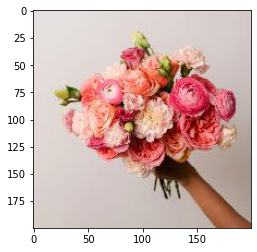

In [31]:
image = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-0.jpg')
pyplot.imshow(image)
pyplot.show()

In [32]:
img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-4.jpg')
print('original size: ', img.size)
img = img.resize([200, 200])

original size:  (200, 200)


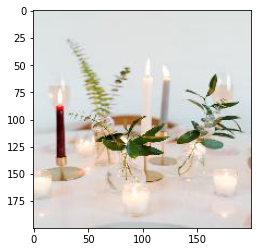

In [33]:
#img_path = img.save('/Users/anaghabalaji/Desktop/flower_images/resize-1.jpg')
pyplot.imshow(img)
pyplot.show()

In [34]:
import os

_, _, files = next(os.walk('/Users/anaghabalaji/Desktop/flower_images/'))
file_count = len(files)
print(file_count)

380


In [35]:
"""for i in range(file_count):
    try: 
        img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')
        img = img.resize([200, 200])
        rgb = img.convert('RGB')
        img_path = rgb.save('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')
    except:
        print('Error occured on ', str(i), 'th image')"""

"for i in range(file_count):\n    try: \n        img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')\n        img = img.resize([200, 200])\n        rgb = img.convert('RGB')\n        img_path = rgb.save('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')\n    except:\n        print('Error occured on ', str(i), 'th image')"

In [36]:
img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-1.jpg')
array = np.asarray(img)

In [37]:
array_data = []
for i in range(1, file_count - 1):
    if i != 97:
        img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-' + str(i) + '.jpg')
        array = np.asarray(img)
        array_data.append(array)

In [38]:
array_data = np.asarray(array_data)

/var/folders/sc/g0x9kgp11qv7yvdsbkhqm9tr0000gn/T/ipykernel_59653/1319265687.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array_data = np.asarray(array_data)


In [39]:
type(array_data)

numpy.ndarray

In [40]:
array_data.shape

(377,)

In [41]:
train_data, test_data = train_test_split(array_data, test_size = .20, 
                                         train_size = .80, shuffle = True)

In [42]:
len(train_data)

301

In [43]:
len(test_data)

76

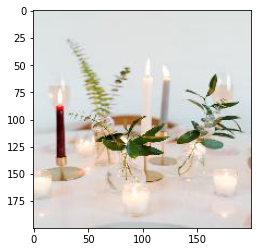

In [44]:
img = Image.open('/Users/anaghabalaji/Desktop/flower_images/image-4.jpg')
pyplot.imshow(img)
pyplot.show()

In [45]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x177078A90>


In [46]:
get_colors(15)

['cream', 'green', 'white']

In [47]:
print(colors)

[]


In [48]:
def euclidDist(color_1, color_2):
    sum = 0
    red_diff = color_2[0] - color_1[0]
    green_diff = color_2[1] - color_1[1]
    blue_diff = color_2[2] - color_1[2]
    sum = (red_diff**2) + (green_diff**2) + (blue_diff**2)
    return sum

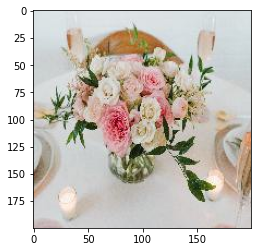

In [49]:
img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-45.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pyplot.imshow(img)
pyplot.show()
img=img.reshape((img.shape[1]*img.shape[0],3))

In [50]:
kmeans=KMeans(n_clusters=5)
s=kmeans.fit(img)

In [51]:
labels=kmeans.labels_
print(labels)
labels=list(labels)

[0 0 0 ... 0 0 0]


In [52]:
centroid=kmeans.cluster_centers_
print(centroid)

[[211.40189589 213.48503945 212.914897  ]
 [ 60.82549451  61.93362637  31.46021978]
 [143.6240298  113.38745731  78.37876436]
 [181.61373218 154.09174864 134.59004216]
 [201.1018797  189.44069549 179.24013158]]


In [53]:
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)

[0.472, 0.056725, 0.08035, 0.1249, 0.266025]


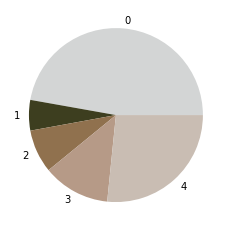

In [54]:
pyplot.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
pyplot.show()

In [55]:
get_colors(12)

['blush', 'cream', 'green', 'white']

In [56]:
def get_pie_chart(index):
    img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    pyplot.imshow(img)
    pyplot.show()
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=10)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    print(percent)
    pyplot.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
    pyplot.show()
    print('Colors from dataframe: ')
    print(get_colors(index))

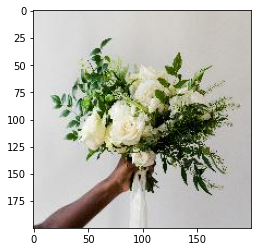

[0.2071, 0.053475, 0.042475, 0.273875, 0.05705, 0.0393, 0.201675, 0.036075, 0.03915, 0.049825]


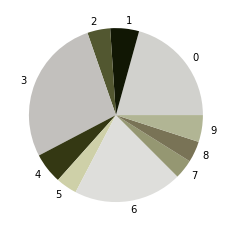

Colors from dataframe: 
['cream', 'green', 'white']


In [57]:
get_pie_chart(15)

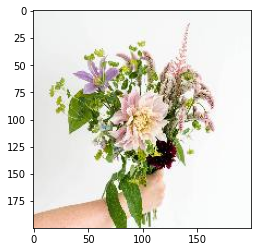

[0.2027, 0.04315, 0.060125, 0.030925, 0.01735, 0.46345, 0.044275, 0.069075, 0.023925, 0.045025]


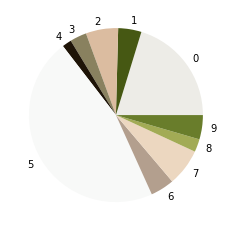

Colors from dataframe: 
['blue', 'blush', 'burgundy', 'cream', 'green', 'lavender', 'pink', 'purple', 'style_colorful']


In [58]:
get_pie_chart(31)

In [59]:
def bounding_rect(index):
    image = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    ROI_number = 0
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    max_w = 0
    max_h = 0
    x_save = 0
    y_save = 0
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        if (w * h) > (max_h * max_w):
            max_w = w
            max_h = h
            x_save = x
            y_save = y
    cv2.rectangle(image, (x_save, y_save), (x_save + max_w, y_save + max_h), (0,0,255), 2)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    specs = [x_save, y_save, max_w, max_h]
    pyplot.imshow(image)
    pyplot.show()
    return specs

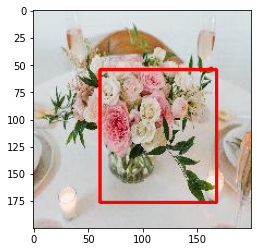

[61, 54, 107, 122]

In [60]:
bounding_rect(45)

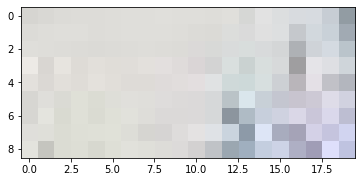

In [61]:
img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-45.jpg')
crop = img[61:70, 20:40]
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pyplot.imshow(crop)
pyplot.show()

In [62]:
def crop_image(index, x, y, w, h):
    img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    crop = img[y:y+h, x:x+w]
    crop=cv2.cvtColor(crop,cv2.COLOR_BGR2RGB)
    return crop

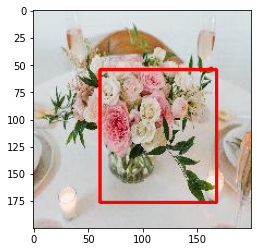

In [63]:
x, y, w, h = bounding_rect(45)
crop = crop_image(45, x, y, w, h)

In [64]:
def get_color_name(rgb_triplet):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

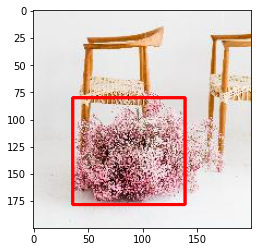

36 80 103 98


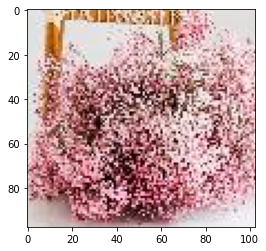

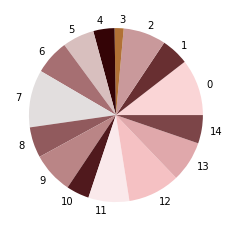

Colors from dataframe: 
['pink']

Colors from image: 
0  -->  mistyrose
1  -->  saddlebrown
2  -->  rosybrown
3  -->  sienna
4  -->  black
5  -->  silver
6  -->  gray
7  -->  gainsboro
8  -->  dimgray
9  -->  rosybrown
10  -->  maroon
11  -->  linen
12  -->  pink
13  -->  tan
14  -->  sienna


In [65]:
def get_pie_chart(index):
    img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    x, y, w, h = bounding_rect(index)
    print(x, y, w, h)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = crop_image(index, x, y, w, h)
    pyplot.imshow(img)
    pyplot.show()
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=15)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    pyplot.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
    pyplot.show()
    print('Colors from dataframe: ')
    colors_webcolors = dict()
    print(get_colors(index))
    print("")
    print('Colors from image: ')
    centroid = centroid.tolist()
    key = 0
    for color in centroid:
        color_name = get_color_name(color)
        colors_webcolors[key] = color_name
        key+=1
    for row in colors_webcolors:
        print(str(row), ' --> ', colors_webcolors[row])
get_pie_chart(69)

In [66]:
def convert_coco(yolo_coordinates):
    coco_coordinates = []
    for box in yolo_coordinates:
        x_yolo = box[0]
        y_yolo = box[1]
        w = box[2]
        h = box[3]
    
        width_coco = w * 200
        height_coco = h * 200
        x_coco = (x_yolo * 200) - (width_coco/2)
        y_coco = (y_yolo * 200) - (height_coco/2)
        width_coco = int(width_coco)
        height_coco = int(height_coco)
        x_coco = int(x_coco)
        y_coco = int(y_coco)
    
        coco_coordinates.append([x_coco, y_coco, width_coco, height_coco])
    return coco_coordinates

In [67]:
def modify(x):
    x = float(x)
    return x

def bb_labeled(index):
    yolo_coordinates = []
    file = open("/Users/anaghabalaji/Desktop/bounding_box/image-" + str(index) + ".txt", "r")
    for line in file:
        lst = line.split(" ")
        lst.pop(0)
        lst = [modify(i) for i in lst]
        yolo_coordinates.append(lst)
    
    
    coco_coordinates = convert_coco(yolo_coordinates)
    image = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    for box in coco_coordinates:
        x_coco = box[0]
        y_coco = box[1]
        width_coco = box[2]
        height_coco = box[3]
        cv2.rectangle(image,(x_coco,y_coco),(x_coco+width_coco,y_coco+height_coco),(0,255,0),2)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    pyplot.imshow(image)
    pyplot.show()


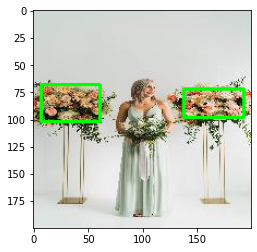

In [68]:
bb_labeled(3)

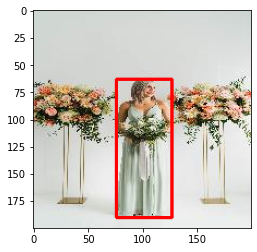

[76, 63, 51, 127]

In [69]:
bounding_rect(3)

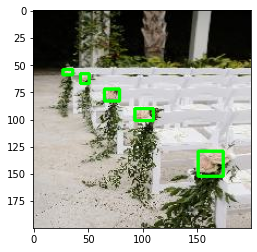

In [70]:
bb_labeled(7)

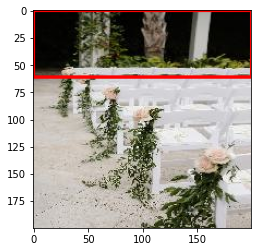

[0, 0, 200, 61]

In [71]:
bounding_rect(7)

In [72]:
def color_wheel(img, index):
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=15)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    pyplot.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
    pyplot.show()
    print('Colors from dataframe: ')
    colors_webcolors = dict()
    print(get_colors(index))
    print("")
    centroid = centroid.tolist()
    key = 0
    for color in centroid:
        color_name = get_color_name(color)
        colors_webcolors[key] = color_name
        key+=1
    colors = []
    for row in colors_webcolors:
        colors.append(colors_webcolors[row])
    return colors

In [73]:
def color_wheel_no_display(img, index):
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=15)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    colors_webcolors = dict()
    centroid = centroid.tolist()
    key = 0
    for color in centroid:
        color_name = get_color_name(color)
        colors_webcolors[key] = color_name
        key+=1
    colors = []
    for row in colors_webcolors:
        colors.append(colors_webcolors[row])
    return colors

In [74]:
def pie_labeled(index):
    yolo_coordinates = []
    file = open("/Users/anaghabalaji/Desktop/bounding_box/image-" + str(index) + ".txt", "r")
    for line in file:
        lst = line.split(" ")
        lst.pop(0)
        lst = [modify(i) for i in lst]
        yolo_coordinates.append(lst)
    
    
    coco_coordinates = convert_coco(yolo_coordinates)
    img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    print("Full Image")
    pyplot.imshow(img)
    pyplot.show()
    all_colors = set()
    for box in coco_coordinates:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]
        img = crop_image(index, x, y, w, h)
        print("Cropped image")
        pyplot.imshow(img)
        pyplot.show()
        colors = color_wheel(img, index)
        for color in colors:
            all_colors.add(color)
    print("Colors:")
    print(all_colors)

In [75]:
def colors_in_crop(index):
    yolo_coordinates = []
    file = open("/Users/anaghabalaji/Desktop/bounding_box/image-" + str(index) + ".txt", "r")
    for line in file:
        lst = line.split(" ")
        lst.pop(0)
        lst = [modify(i) for i in lst]
        yolo_coordinates.append(lst)
    
    
    coco_coordinates = convert_coco(yolo_coordinates)
    img = cv2.imread('/Users/anaghabalaji/Desktop/flower_images/image-' + str(index) + '.jpg')
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    all_colors = set()
    for box in coco_coordinates:
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        x = box[0]
        y = box[1]
        w = box[2]
        h = box[3]
        img = crop_image(index, x, y, w, h)
        colors = color_wheel_no_display(img, index)
        for color in colors:
            all_colors.add(color)
    return all_colors

In [76]:
colors_in_crop(3)

{'antiquewhite',
 'black',
 'burlywood',
 'darkkhaki',
 'darkolivegreen',
 'darksalmon',
 'dimgray',
 'gray',
 'lightgray',
 'maroon',
 'peru',
 'rosybrown',
 'saddlebrown',
 'sienna',
 'tan',
 'wheat'}

Full Image


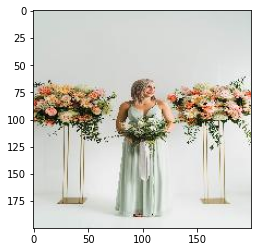

Cropped image


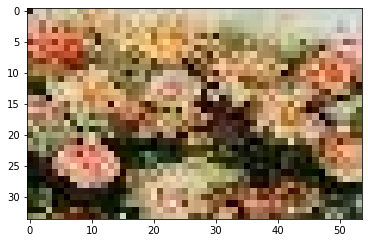

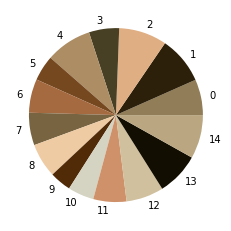

Colors from dataframe: 
[]

Cropped image


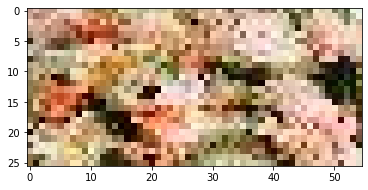

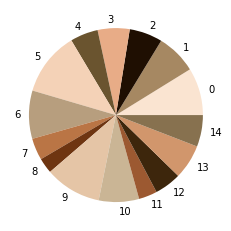

Colors from dataframe: 
[]

Colors:
{'saddlebrown', 'maroon', 'darksalmon', 'antiquewhite', 'peru', 'dimgray', 'tan', 'black', 'rosybrown', 'lightgray', 'burlywood', 'gray', 'sienna', 'darkolivegreen', 'wheat'}


In [77]:
pie_labeled(3)

In [78]:
"""colors_web = {}
for i in range(file_count):
    try: 
        print(i)
        colors = colors_in_crop(i)
        colors_web[i] =  colors
    except:
        print(str(i) + " was skipped")"""

'colors_web = {}\nfor i in range(file_count):\n    try: \n        print(i)\n        colors = colors_in_crop(i)\n        colors_web[i] =  colors\n    except:\n        print(str(i) + " was skipped")'

In [79]:
colors_web = {0: {'rosybrown', 'maroon', 'gainsboro', 'brown', 'sienna', 'lightgray', 'salmon', 'lightcoral', 'indianred', 'black', 'saddlebrown', 'peachpuff', 'burlywood'}, 1: {'tan', 'gainsboro', 'wheat', 'palegoldenrod', 'lightgray', 'silver', 'indianred', 'saddlebrown', 'darkslategray', 'darkgray', 'antiquewhite', 'darkolivegreen', 'gray'}, 2: {'linen', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 3: {'rosybrown', 'darkkhaki', 'blanchedalmond', 'maroon', 'darksalmon', 'sienna', 'tan', 'wheat', 'lightgray', 'black', 'saddlebrown', 'peachpuff', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 4: {'rosybrown', 'tan', 'palegoldenrod', 'lightgray', 'olivedrab', 'darkolivegreen', 'darkkhaki', 'darkgreen', 'black', 'dimgray', 'gainsboro', 'silver', 'papayawhip', 'darksalmon', 'darkseagreen', 'darkslategray', 'lavender', 'darkgray', 'gray'}, 5: {'linen', 'gainsboro', 'lightgray', 'snow', 'silver', 'whitesmoke', 'darkgray', 'gray', 'dimgray'}, 6: {'rosybrown', 'maroon', 'sienna', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 7: {'rosybrown', 'tan', 'gainsboro', 'wheat', 'lightgray', 'silver', 'black', 'bisque', 'darkslategray', 'darkgray', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 8: {'rosybrown', 'firebrick', 'wheat', 'gainsboro', 'maroon', 'tan', 'lightgray', 'sandybrown', 'silver', 'peru', 'darkslategray', 'burlywood', 'darkolivegreen', 'chocolate', 'gray'}, 9: {'darksalmon', 'tan', 'maroon', 'brown', 'black', 'indianred', 'bisque', 'antiquewhite', 'lightpink', 'peachpuff', 'burlywood', 'darkolivegreen', 'gray'}, 10: {'linen', 'chocolate', 'maroon', 'tan', 'wheat', 'gainsboro', 'sandybrown', 'silver', 'black', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 11: {'rosybrown', 'linen', 'wheat', 'gainsboro', 'sienna', 'tan', 'lightgray', 'silver', 'black', 'bisque', 'darkslategray', 'saddlebrown', 'dimgray'}, 12: {'rosybrown', 'linen', 'wheat', 'sienna', 'lightgray', 'silver', 'black', 'antiquewhite', 'peachpuff', 'burlywood', 'darkolivegreen', 'gray'}, 13: {'rosybrown', 'linen', 'darksalmon', 'lightgray', 'black', 'bisque', 'saddlebrown', 'peachpuff', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 14: {'darkseagreen', 'lightgray', 'beige', 'silver', 'black', 'oldlace', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 15: {'darkkhaki', 'tan', 'gainsboro', 'lightgray', 'beige', 'silver', 'darkgreen', 'black', 'darkslategray', 'darkolivegreen', 'gray'}, 16: {'rosybrown', 'darkkhaki', 'maroon', 'tan', 'sienna', 'navajowhite', 'lightsalmon', 'lightgray', 'olivedrab', 'indianred', 'saddlebrown', 'antiquewhite', 'chocolate', 'darkolivegreen', 'peru'}, 17: {'rosybrown', 'darksalmon', 'tan', 'wheat', 'sienna', 'darkgoldenrod', 'goldenrod', 'black', 'saddlebrown', 'antiquewhite', 'burlywood', 'darkolivegreen', 'peru'}, 18: {'rosybrown', 'darksalmon', 'tan', 'sienna', 'lightgray', 'silver', 'black', 'saddlebrown', 'antiquewhite', 'darkolivegreen', 'peru', 'dimgray'}, 19: {'darkkhaki', 'tan', 'wheat', 'burlywood', 'lightgray', 'silver', 'black', 'saddlebrown', 'antiquewhite', 'chocolate', 'darkolivegreen', 'peru', 'gray'}, 20: {'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 21: {'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 22: {'darkkhaki', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'darkslategray', 'darkgray', 'saddlebrown', 'gray', 'dimgray'}, 23: {'rosybrown', 'darkkhaki', 'darksalmon', 'wheat', 'sienna', 'tan', 'navajowhite', 'black', 'bisque', 'saddlebrown', 'antiquewhite', 'lightpink', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 24: {'rosybrown', 'tan', 'wheat', 'sienna', 'lightgray', 'black', 'antiquewhite', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 25: {'rosybrown', 'linen', 'darkkhaki', 'tan', 'pink', 'wheat', 'darkgoldenrod', 'sandybrown', 'goldenrod', 'black', 'saddlebrown', 'darkolivegreen', 'dimgray'}, 26: {'darkkhaki', 'darksalmon', 'wheat', 'sienna', 'maroon', 'darkgoldenrod', 'beige', 'goldenrod', 'black', 'saddlebrown', 'burlywood', 'darkolivegreen', 'gray'}, 27: {'darkkhaki', 'wheat', 'sienna', 'tan', 'coral', 'sandybrown', 'goldenrod', 'olivedrab', 'black', 'saddlebrown', 'antiquewhite', 'chocolate', 'darkolivegreen', 'dimgray'}, 28: {'rosybrown', 'darkkhaki', 'wheat', 'navajowhite', 'silver', 'black', 'antiquewhite', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 29: {'darkkhaki', 'linen', 'gainsboro', 'palegoldenrod', 'lightgray', 'silver', 'olivedrab', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 30: {'darkkhaki', 'linen', 'gainsboro', 'darkseagreen', 'silver', 'darkgreen', 'olivedrab', 'black', 'darkolivegreen', 'gray', 'dimgray'}, 31: {'rosybrown', 'darkkhaki', 'linen', 'wheat', 'tan', 'lightgray', 'olivedrab', 'black', 'antiquewhite', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 32: {'darkkhaki', 'linen', 'tan', 'wheat', 'khaki', 'gainsboro', 'darkgoldenrod', 'sandybrown', 'goldenrod', 'black', 'saddlebrown', 'antiquewhite', 'darkolivegreen', 'peru'}, 33: {'darkkhaki', 'blanchedalmond', 'tan', 'wheat', 'palegoldenrod', 'beige', 'olivedrab', 'black', 'darkolivegreen', 'khaki'}, 34: {'rosybrown', 'tan', 'gainsboro', 'wheat', 'lightgray', 'beige', 'silver', 'black', 'antiquewhite', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 35: {'tan', 'wheat', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'antiquewhite', 'darkslategray', 'darkgray', 'burlywood', 'peru', 'dimgray'}, 36: {'rosybrown', 'wheat', 'tan', 'gainsboro', 'sienna', 'pink', 'lightgray', 'sandybrown', 'silver', 'bisque', 'antiquewhite', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru'}, 37: {'rosybrown', 'maroon', 'tan', 'wheat', 'palegoldenrod', 'darkolivegreen', 'darkkhaki', 'black', 'saddlebrown', 'blanchedalmond', 'sienna', 'gainsboro', 'silver', 'peru', 'darksalmon', 'navajowhite', 'antiquewhite', 'darkslategray', 'darkgray', 'peachpuff', 'burlywood', 'gray'}, 38: {'darkkhaki', 'linen', 'wheat', 'darkseagreen', 'lightgray', 'darkgoldenrod', 'silver', 'goldenrod', 'bisque', 'antiquewhite', 'darkgray', 'burlywood', 'gray', 'dimgray'}, 39: {'darkkhaki', 'linen', 'tan', 'wheat', 'black', 'bisque', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 40: {'rosybrown', 'maroon', 'lightgray', 'snow', 'black', 'darkslategray', 'darkolivegreen', 'dimgray'}, 41: {'rosybrown', 'tan', 'lightgray', 'beige', 'silver', 'black', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 42: {'darkkhaki', 'tan', 'sienna', 'gainsboro', 'lightgray', 'olivedrab', 'darkgreen', 'black', 'darkolivegreen', 'gray'}, 43: {'darkseagreen', 'seagreen', 'lightslategray', 'silver', 'slategray', 'black', 'darkgray', 'saddlebrown', 'darkslategray', 'peachpuff', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 44: {'wheat', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 45: {'rosybrown', 'maroon', 'tan', 'darksalmon', 'palevioletred', 'lightgray', 'silver', 'black', 'indianred', 'lightpink', 'brown', 'darkolivegreen', 'gray'}, 46: {'darkkhaki', 'tan', 'gainsboro', 'darkseagreen', 'black', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 47: {'rosybrown', 'maroon', 'tan', 'wheat', 'palegoldenrod', 'lightgray', 'lightpink', 'darkolivegreen', 'darkkhaki', 'pink', 'lightsalmon', 'saddlebrown', 'chocolate', 'dimgray', 'gainsboro', 'sienna', 'sandybrown', 'silver', 'peru', 'darksalmon', 'darkgray', 'peachpuff', 'burlywood', 'khaki', 'gray'}, 48: {'rosybrown', 'maroon', 'tan', 'wheat', 'palegoldenrod', 'lightgray', 'darkgoldenrod', 'goldenrod', 'olivedrab', 'lavender', 'lightpink', 'darkolivegreen', 'darkkhaki', 'pink', 'lightsalmon', 'black', 'saddlebrown', 'dimgray', 'linen', 'sienna', 'gainsboro', 'sandybrown', 'gold', 'silver', 'aliceblue', 'slategray', 'bisque', 'mistyrose', 'peru', 'orange', 'darksalmon', 'navajowhite', 'darkseagreen', 'midnightblue', 'thistle', 'salmon', 'olive', 'lightslategray', 'indianred', 'antiquewhite', 'darkslategray', 'darkgray', 'peachpuff', 'burlywood', 'khaki', 'gray'}, 49: {'darkkhaki', 'wheat', 'tan', 'gainsboro', 'yellowgreen', 'palegoldenrod', 'lightgray', 'silver', 'darkgreen', 'olivedrab', 'black', 'papayawhip', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 50: {'darkkhaki', 'maroon', 'wheat', 'sienna', 'tan', 'saddlebrown', 'antiquewhite', 'burlywood', 'peru'}, 51: {'rosybrown', 'linen', 'maroon', 'tan', 'sienna', 'wheat', 'bisque', 'saddlebrown', 'peachpuff', 'burlywood', 'peru'}, 52: {'darkkhaki', 'wheat', 'tan', 'gainsboro', 'khaki', 'beige', 'darkgreen', 'olivedrab', 'black', 'darkolivegreen', 'peru', 'dimgray'}, 53: {'rosybrown', 'tan', 'gainsboro', 'lightgray', 'silver', 'black', 'darkolivegreen', 'gray', 'dimgray'}, 54: {'rosybrown', 'wheat', 'tan', 'sienna', 'silver', 'black', 'indianred', 'darkolivegreen', 'gray', 'dimgray'}, 55: {'rosybrown', 'darkkhaki', 'tan', 'sienna', 'wheat', 'lightgray', 'silver', 'black', 'antiquewhite', 'saddlebrown', 'burlywood', 'gray'}, 56: {'tomato', 'tan', 'gainsboro', 'sienna', 'wheat', 'sandybrown', 'beige', 'silver', 'black', 'saddlebrown', 'burlywood', 'darkolivegreen', 'chocolate', 'gray'}, 57: {'darkkhaki', 'tan', 'gainsboro', 'wheat', 'sandybrown', 'beige', 'silver', 'peru', 'black', 'saddlebrown', 'darkslategray', 'burlywood', 'darkolivegreen', 'chocolate', 'gray'}, 58: {'rosybrown', 'blanchedalmond', 'linen', 'wheat', 'tan', 'gainsboro', 'silver', 'black', 'bisque', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 59: {'maroon', 'wheat', 'palegoldenrod', 'lightgray', 'goldenrod', 'brown', 'black', 'lightcoral', 'saddlebrown', 'chocolate', 'gold', 'slategray', 'bisque', 'peru', 'darksalmon', 'indianred', 'darkslategray', 'crimson', 'cornsilk', 'burlywood', 'khaki'}, 60: {'tan', 'darkseagreen', 'palegoldenrod', 'beige', 'darkgreen', 'black', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 61: {'gainsboro', 'darkseagreen', 'beige', 'silver', 'darkgreen', 'black', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 62: {'darkkhaki', 'linen', 'wheat', 'tan', 'lightgray', 'olivedrab', 'black', 'antiquewhite', 'burlywood', 'darkolivegreen', 'peru'}, 63: {'darkkhaki', 'rosybrown', 'linen', 'tan', 'wheat', 'olivedrab', 'black', 'antiquewhite', 'saddlebrown', 'darkolivegreen', 'khaki', 'gray', 'dimgray'}, 64: {'darkkhaki', 'darksalmon', 'wheat', 'tan', 'beige', 'darkgreen', 'olivedrab', 'black', 'indianred', 'saddlebrown', 'antiquewhite', 'darkolivegreen'}, 65: {'darkkhaki', 'rosybrown', 'maroon', 'tan', 'sienna', 'gainsboro', 'navajowhite', 'darkgoldenrod', 'black', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru'}, 66: {'darkseagreen', 'lightgray', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 67: {'rosybrown', 'maroon', 'pink', 'sienna', 'tan', 'mistyrose', 'lavenderblush', 'silver', 'black', 'indianred', 'saddlebrown', 'lightpink', 'dimgray'}, 68: {'rosybrown', 'darksalmon', 'tan', 'sienna', 'maroon', 'gainsboro', 'beige', 'silver', 'black', 'indianred', 'darkslategray', 'peachpuff', 'burlywood', 'darkolivegreen', 'dimgray'}, 69: {'rosybrown', 'maroon', 'tan', 'lightpink', 'sienna', 'pink', 'black', 'saddlebrown', 'mistyrose', 'gray', 'dimgray'}, 70: {'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'whitesmoke', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 71: {'chocolate', 'darksalmon', 'tan', 'sienna', 'wheat', 'darkgoldenrod', 'goldenrod', 'black', 'saddlebrown', 'mistyrose', 'burlywood', 'darkolivegreen', 'peru'}, 72: {'darkkhaki', 'tan', 'lightgray', 'beige', 'silver', 'whitesmoke', 'black', 'darkolivegreen', 'gray', 'dimgray'}, 73: {'darkkhaki', 'hotpink', 'mediumvioletred', 'rosybrown', 'black', 'darkslateblue', 'antiquewhite', 'plum', 'darkslategray', 'brown', 'mediumpurple', 'purple', 'indigo', 'dimgray'}, 74: {'mediumvioletred', 'maroon', 'gainsboro', 'midnightblue', 'palevioletred', 'silver', 'slategray', 'black', 'darkslategray', 'crimson', 'brown', 'darkolivegreen', 'gray'}, 75: {'rosybrown', 'maroon', 'firebrick', 'palevioletred', 'mistyrose', 'silver', 'black', 'lightcoral', 'indianred', 'crimson', 'lightpink', 'darkolivegreen', 'dimgray'}, 76: {'rosybrown', 'tan', 'wheat', 'gainsboro', 'lightgray', 'silver', 'whitesmoke', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 77: {'darksalmon', 'beige', 'silver', 'black', 'indianred', 'lightcoral', 'darkgray', 'peachpuff', 'lightpink', 'brown', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 78: {'rosybrown', 'lightgray', 'lightslategray', 'silver', 'slategray', 'black', 'darkgray', 'darkslategray', 'gray', 'dimgray'}, 79: {'tan', 'gainsboro', 'lightgray', 'silver', 'whitesmoke', 'slategray', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 80: {'firebrick', 'tan', 'lightsalmon', 'darkred', 'black', 'indianred', 'lightcoral', 'antiquewhite', 'lightpink', 'darkolivegreen', 'peru', 'gray'}, 81: {'rosybrown', 'mediumvioletred', 'darksalmon', 'pink', 'palevioletred', 'silver', 'goldenrod', 'black', 'darkslategray', 'mistyrose', 'brown', 'burlywood', 'chocolate', 'gray', 'dimgray'}, 82: {'rosybrown', 'linen', 'tan', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'whitesmoke', 'black', 'darkolivegreen', 'gray', 'dimgray'}, 83: {'darkkhaki', 'palegoldenrod', 'orchid', 'thistle', 'sandybrown', 'gold', 'beige', 'goldenrod', 'darkgoldenrod', 'black', 'saddlebrown', 'darkolivegreen', 'dimgray'}, 84: {'gainsboro', 'darkseagreen', 'lightgray', 'lightslategray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 85: {'gainsboro', 'lightgray', 'lightslategray', 'silver', 'slategray', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 86: {'darkkhaki', 'gainsboro', 'olive', 'lightslategray', 'silver', 'goldenrod', 'black', 'darkslategray', 'saddlebrown', 'dimgray', 'darkolivegreen', 'khaki', 'gray', 'orange'}, 87: {'darkkhaki', 'darksalmon', 'tan', 'sienna', 'burlywood', 'wheat', 'black', 'saddlebrown', 'coral', 'chocolate', 'darkolivegreen', 'peru', 'gray'}, 88: {'rosybrown', 'darksalmon', 'wheat', 'sienna', 'tan', 'lightgray', 'beige', 'silver', 'black', 'bisque', 'oldlace', 'darkslategray', 'burlywood', 'darkolivegreen', 'gray'}, 89: {'rosybrown', 'wheat', 'darkseagreen', 'silver', 'black', 'cornsilk', 'darkslategray', 'darkgray', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 90: {'maroon', 'firebrick', 'black', 'darkslategray', 'darkgray', 'brown', 'gray', 'dimgray'}, 91: {'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 92: {'darkkhaki', 'tan', 'gainsboro', 'silver', 'black', 'antiquewhite', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 93: {'lightgray', 'silver', 'black', 'oldlace', 'darkgray', 'darkslategray', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 94: {'darkkhaki', 'linen', 'wheat', 'tan', 'sienna', 'saddlebrown', 'antiquewhite', 'burlywood', 'peru'}, 95: {'rosybrown', 'maroon', 'sienna', 'gainsboro', 'mistyrose', 'lightgray', 'silver', 'black', 'indianred', 'seashell', 'darkgray', 'darkslategray', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 96: {'rosybrown', 'gainsboro', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 98: {'linen', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 99: {'rosybrown', 'darkkhaki', 'maroon', 'wheat', 'tan', 'sienna', 'khaki', 'darkred', 'black', 'antiquewhite', 'saddlebrown', 'darkolivegreen', 'peru'}, 100: {'darkseagreen', 'lightgray', 'silver', 'black', 'oldlace', 'darkslategray', 'darkgray', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 101: {'rosybrown', 'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'antiquewhite', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 102: {'rosybrown', 'tan', 'gainsboro', 'wheat', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 103: {'rosybrown', 'maroon', 'tan', 'gainsboro', 'yellowgreen', 'whitesmoke', 'black', 'saddlebrown', 'brown', 'darkolivegreen', 'dimgray'}, 104: {'darkkhaki', 'gainsboro', 'lightgray', 'darkgoldenrod', 'silver', 'whitesmoke', 'black', 'darkgray', 'darkslategray', 'khaki', 'gray', 'dimgray'}, 105: {'rosybrown', 'wheat', 'silver', 'black', 'darkslategray', 'lavender', 'darkgray', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 106: {'darkkhaki', 'tan', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 107: {'linen', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 108: {'rosybrown', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'oldlace', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 109: {'darkseagreen', 'lightgray', 'silver', 'black', 'oldlace', 'antiquewhite', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 110: {'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 111: {'tan', 'gainsboro', 'darkseagreen', 'palegoldenrod', 'lightgray', 'silver', 'olivedrab', 'black', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 112: {'rosybrown', 'linen', 'tan', 'wheat', 'darkseagreen', 'darkgreen', 'black', 'antiquewhite', 'darkolivegreen', 'dimgray'}, 113: {'rosybrown', 'tan', 'gainsboro', 'wheat', 'palevioletred', 'lightslategray', 'black', 'indianred', 'darkslategray', 'lightpink', 'brown', 'burlywood', 'dimgray'}, 114: {'maroon', 'gainsboro', 'sienna', 'silver', 'whitesmoke', 'darkgreen', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 115: {'rosybrown', 'darkkhaki', 'linen', 'maroon', 'tan', 'sienna', 'gainsboro', 'lightgray', 'silver', 'black', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 116: {'linen', 'gainsboro', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 117: {'rosybrown', 'wheat', 'tan', 'lightgray', 'beige', 'silver', 'black', 'darkslategray', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 118: {'darkkhaki', 'linen', 'tan', 'gainsboro', 'lightgray', 'silver', 'black', 'darkolivegreen', 'gray', 'dimgray'}, 119: {'darkkhaki', 'rosybrown', 'chocolate', 'tan', 'gainsboro', 'sienna', 'sandybrown', 'silver', 'black', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 120: {'rosybrown', 'maroon', 'salmon', 'lightslategray', 'black', 'indianred', 'darkslategray', 'lightpink', 'brown', 'gray', 'dimgray'}, 121: {'rosybrown', 'darksalmon', 'wheat', 'sienna', 'lightgray', 'silver', 'black', 'bisque', 'darkslategray', 'antiquewhite', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 122: {'rosybrown', 'darksalmon', 'tan', 'sienna', 'wheat', 'black', 'indianred', 'antiquewhite', 'saddlebrown', 'burlywood', 'darkolivegreen', 'dimgray'}, 123: {'rosybrown', 'darksalmon', 'tan', 'gainsboro', 'sienna', 'wheat', 'black', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 124: {'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 125: {'rosybrown', 'sienna', 'black', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 126: {'rosybrown', 'linen', 'maroon', 'tan', 'gainsboro', 'sienna', 'darkred', 'black', 'saddlebrown', 'darkslategray', 'brown', 'darkolivegreen', 'gray'}, 127: {'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 128: {'linen', 'gainsboro', 'lightgray', 'snow', 'silver', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 129: {'rosybrown', 'darkseagreen', 'lightgray', 'beige', 'silver', 'black', 'darkgray', 'antiquewhite', 'darkslategray', 'saddlebrown', 'darkolivegreen', 'gray', 'dimgray'}, 130: {'rosybrown', 'lightgray', 'silver', 'black', 'antiquewhite', 'darkgray', 'darkslategray', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 131: {'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'slategray', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 132: {'wheat', 'sienna', 'darkgreen', 'slategray', 'black', 'darkgray', 'plum', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 133: {'rosybrown', 'darkkhaki', 'tan', 'sienna', 'gainsboro', 'wheat', 'lightgray', 'silver', 'olivedrab', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'peru', 'gray'}, 134: {'darkkhaki', 'tan', 'gainsboro', 'wheat', 'palegoldenrod', 'lightgray', 'beige', 'silver', 'darkgray', 'antiquewhite', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 135: {'rosybrown', 'darksalmon', 'tan', 'sienna', 'gainsboro', 'wheat', 'lightgray', 'silver', 'antiquewhite', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru', 'dimgray'}, 136: {'gainsboro', 'darkseagreen', 'lightgray', 'lightslategray', 'silver', 'lavender', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 137: {'rosybrown', 'tan', 'sienna', 'wheat', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'indianred', 'darkgray', 'saddlebrown', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 138: {'darkkhaki', 'rosybrown', 'tan', 'sienna', 'gainsboro', 'wheat', 'lightgray', 'silver', 'olivedrab', 'black', 'bisque', 'darkgray', 'antiquewhite', 'darkolivegreen', 'peru', 'gray'}, 139: {'rosybrown', 'tan', 'gainsboro', 'sienna', 'lightgray', 'beige', 'silver', 'black', 'indianred', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 140: {'darkkhaki', 'wheat', 'gainsboro', 'tan', 'palegoldenrod', 'lightgray', 'silver', 'black', 'darkolivegreen', 'gray', 'dimgray'}, 141: {'rosybrown', 'wheat', 'tan', 'gainsboro', 'sienna', 'lightgray', 'silver', 'black', 'indianred', 'saddlebrown', 'antiquewhite', 'burlywood', 'gray'}, 142: {'rosybrown', 'tan', 'sienna', 'gainsboro', 'lightpink', 'mistyrose', 'lightgray', 'black', 'bisque', 'saddlebrown', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray'}, 143: {'rosybrown', 'linen', 'wheat', 'tan', 'gainsboro', 'lightgray', 'silver', 'black', 'bisque', 'darkslategray', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 144: {'tomato', 'wheat', 'tan', 'burlywood', 'sienna', 'sandybrown', 'silver', 'black', 'saddlebrown', 'darkgray', 'antiquewhite', 'darkslategray', 'chocolate', 'peru', 'gray'}, 145: {'rosybrown', 'lightgray', 'lightslategray', 'silver', 'slategray', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 146: {'rosybrown', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 147: {'linen', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'whitesmoke', 'black', 'darkgray', 'darkslategray', 'honeydew', 'darkolivegreen', 'gray', 'dimgray'}, 148: {'darkseagreen', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 149: {'darkkhaki', 'linen', 'tan', 'gainsboro', 'wheat', 'palegoldenrod', 'lightgray', 'silver', 'antiquewhite', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 150: {'lightgray', 'black', 'darkslategray', 'saddlebrown', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 151: {'darkkhaki', 'rosybrown', 'darksalmon', 'tan', 'sienna', 'wheat', 'black', 'indianred', 'antiquewhite', 'brown', 'burlywood', 'darkolivegreen', 'peru'}, 152: {'darkkhaki', 'tan', 'lightgray', 'silver', 'darkgreen', 'olivedrab', 'darkolivegreen', 'gray', 'dimgray'}, 153: {'floralwhite', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 154: {'rosybrown', 'linen', 'darkkhaki', 'wheat', 'gainsboro', 'silver', 'whitesmoke', 'darkgreen', 'darkslategray', 'antiquewhite', 'darkolivegreen', 'khaki', 'gray', 'dimgray'}, 155: {'tan', 'gainsboro', 'lightgray', 'beige', 'silver', 'whitesmoke', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 156: {'rosybrown', 'darksalmon', 'tan', 'wheat', 'sienna', 'gainsboro', 'sandybrown', 'silver', 'black', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 157: {'darkkhaki', 'palevioletred', 'lightgray', 'sandybrown', 'goldenrod', 'peru', 'black', 'darkslategray', 'darkgray', 'lightpink', 'brown', 'darkolivegreen', 'khaki', 'dimgray'}, 158: {'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 159: {'darkkhaki', 'linen', 'tan', 'wheat', 'silver', 'black', 'bisque', 'darkolivegreen', 'gray', 'dimgray'}, 160: {'rosybrown', 'tan', 'gainsboro', 'lightgray', 'silver', 'black', 'darkolivegreen', 'gray', 'dimgray'}, 161: {'linen', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'whitesmoke', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 162: {'rosybrown', 'linen', 'darksalmon', 'tan', 'sienna', 'darkseagreen', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'indianred', 'saddlebrown', 'darkslategray', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 163: {'linen', 'floralwhite', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'antiquewhite', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 164: {'rosybrown', 'linen', 'darksalmon', 'tan', 'wheat', 'sienna', 'black', 'indianred', 'bisque', 'saddlebrown', 'burlywood', 'peru', 'gray'}, 165: {'gainsboro', 'darkseagreen', 'lightgray', 'lightslategray', 'silver', 'lavender', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 166: {'blanchedalmond', 'darksalmon', 'wheat', 'sienna', 'tan', 'beige', 'black', 'peachpuff', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 167: {'darkkhaki', 'tan', 'gainsboro', 'wheat', 'palegoldenrod', 'lightgray', 'silver', 'black', 'darkolivegreen', 'gray', 'dimgray'}, 168: {'rosybrown', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 169: {'tan', 'wheat', 'darkseagreen', 'lightgray', 'black', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 170: {'rosybrown', 'darksalmon', 'tan', 'lightgray', 'black', 'antiquewhite', 'saddlebrown', 'darkslategray', 'peachpuff', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 171: {'gainsboro', 'darkseagreen', 'seagreen', 'forestgreen', 'silver', 'darkgreen', 'black', 'darkslategray', 'mediumseagreen', 'honeydew', 'gray'}, 172: {'darkkhaki', 'linen', 'rosybrown', 'tan', 'darkseagreen', 'lightgray', 'black', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 173: {'wheat', 'gainsboro', 'tan', 'lightgray', 'beige', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray'}, 174: {'rosybrown', 'tan', 'gainsboro', 'wheat', 'lightgray', 'silver', 'black', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 175: {'rosybrown', 'linen', 'gainsboro', 'lightgray', 'silver', 'whitesmoke', 'black', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 176: {'darkkhaki', 'tan', 'gainsboro', 'yellowgreen', 'palegoldenrod', 'lightgray', 'beige', 'lightgoldenrodyellow', 'silver', 'olivedrab', 'darkolivegreen'}, 177: {'rosybrown', 'gainsboro', 'lightgray', 'silver', 'darkgray', 'burlywood', 'darkolivegreen', 'peru', 'dimgray'}, 178: {'rosybrown', 'wheat', 'tan', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 179: {'rosybrown', 'tan', 'sienna', 'darkseagreen', 'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'seashell', 'antiquewhite', 'darkgray', 'gray', 'dimgray'}, 180: {'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 181: {'gainsboro', 'sienna', 'darkseagreen', 'lightgray', 'whitesmoke', 'darkgreen', 'black', 'darkgray', 'saddlebrown', 'darkolivegreen', 'dimgray'}, 182: {'darkkhaki', 'tan', 'gainsboro', 'lightgray', 'silver', 'darkgreen', 'olivedrab', 'black', 'darkolivegreen', 'gray'}, 183: {'darkkhaki', 'linen', 'tan', 'gainsboro', 'sienna', 'palegoldenrod', 'lightgray', 'silver', 'darkgreen', 'olivedrab', 'black', 'darkolivegreen', 'gray'}, 184: {'darkkhaki', 'wheat', 'tan', 'gainsboro', 'palegoldenrod', 'lightgray', 'silver', 'black', 'antiquewhite', 'darkslategray', 'darkolivegreen', 'gray'}, 185: {'rosybrown', 'linen', 'gainsboro', 'sienna', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 186: {'rosybrown', 'linen', 'wheat', 'tan', 'silver', 'black', 'antiquewhite', 'burlywood', 'darkolivegreen', 'dimgray'}, 187: {'rosybrown', 'darkkhaki', 'tan', 'sienna', 'gainsboro', 'wheat', 'lightgray', 'beige', 'silver', 'black', 'antiquewhite', 'saddlebrown', 'burlywood', 'dimgray'}, 188: {'rosybrown', 'maroon', 'sienna', 'lightgray', 'silver', 'lavender', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 189: {'rosybrown', 'maroon', 'wheat', 'sienna', 'darksalmon', 'tan', 'beige', 'silver', 'black', 'indianred', 'saddlebrown', 'burlywood', 'darkolivegreen', 'gray'}, 190: {'darkkhaki', 'rosybrown', 'tan', 'sienna', 'navajowhite', 'lightgray', 'black', 'bisque', 'indianred', 'antiquewhite', 'brown', 'burlywood', 'darkolivegreen', 'gray'}, 191: {'rosybrown', 'linen', 'maroon', 'tan', 'lightgray', 'silver', 'black', 'indianred', 'brown', 'darkolivegreen', 'dimgray'}, 192: {'rosybrown', 'maroon', 'tan', 'sienna', 'lightgray', 'black', 'lightcoral', 'indianred', 'antiquewhite', 'lightpink', 'darkolivegreen', 'dimgray'}, 193: {'darkkhaki', 'darksalmon', 'wheat', 'sienna', 'tan', 'goldenrod', 'black', 'antiquewhite', 'seashell', 'lightpink', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 194: {'darkkhaki', 'darksalmon', 'tan', 'wheat', 'sienna', 'sandybrown', 'olivedrab', 'black', 'indianred', 'seashell', 'antiquewhite', 'burlywood', 'darkolivegreen'}, 195: {'rosybrown', 'darkkhaki', 'darksalmon', 'navajowhite', 'sienna', 'silver', 'olivedrab', 'black', 'indianred', 'saddlebrown', 'mistyrose', 'peachpuff'}, 196: {'rosybrown', 'maroon', 'pink', 'tan', 'mistyrose', 'lightslategray', 'silver', 'lightcoral', 'black', 'indianred', 'lightpink', 'brown', 'darkolivegreen', 'dimgray'}, 197: {'rosybrown', 'maroon', 'tan', 'sienna', 'wheat', 'darksalmon', 'lightcoral', 'black', 'bisque', 'indianred', 'brown', 'darkolivegreen', 'dimgray'}, 198: {'rosybrown', 'mediumvioletred', 'maroon', 'wheat', 'tan', 'palevioletred', 'orchid', 'olivedrab', 'black', 'antiquewhite', 'brown', 'darkolivegreen', 'dimgray'}, 199: {'rosybrown', 'linen', 'maroon', 'gainsboro', 'sienna', 'palevioletred', 'silver', 'black', 'indianred', 'saddlebrown', 'darkslategray', 'lightpink', 'darkolivegreen', 'gray'}, 200: {'linen', 'maroon', 'gainsboro', 'sienna', 'palevioletred', 'silver', 'black', 'indianred', 'saddlebrown', 'darkgray', 'lightpink', 'darkslategray', 'gray', 'dimgray'}, 201: {'linen', 'tan', 'wheat', 'darkseagreen', 'gainsboro', 'lightgray', 'silver', 'whitesmoke', 'black', 'bisque', 'darkslategray', 'darkgray', 'peru', 'gray', 'dimgray'}, 202: {'linen', 'sienna', 'gainsboro', 'lightpink', 'lightgray', 'silver', 'black', 'antiquewhite', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 203: {'rosybrown', 'darksalmon', 'tan', 'sienna', 'wheat', 'black', 'bisque', 'antiquewhite', 'saddlebrown', 'lightpink', 'burlywood', 'peru'}, 204: {'rosybrown', 'darksalmon', 'wheat', 'sienna', 'tan', 'silver', 'black', 'bisque', 'saddlebrown', 'antiquewhite', 'burlywood', 'peru'}, 205: {'rosybrown', 'linen', 'darksalmon', 'gainsboro', 'sienna', 'lightgray', 'silver', 'black', 'indianred', 'darkslategray', 'saddlebrown', 'lightpink', 'darkolivegreen', 'dimgray'}, 206: {'darkkhaki', 'linen', 'wheat', 'tan', 'lightgray', 'silver', 'black', 'bisque', 'antiquewhite', 'darkgray', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 207: {'darksalmon', 'sienna', 'sandybrown', 'lightslategray', 'black', 'saddlebrown', 'darkslategray', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 208: {'chocolate', 'maroon', 'firebrick', 'sienna', 'darksalmon', 'lightslategray', 'silver', 'black', 'saddlebrown', 'darkgray', 'darkslategray', 'burlywood', 'peru', 'gray', 'dimgray'}, 209: {'rosybrown', 'gainsboro', 'midnightblue', 'sandybrown', 'lightslategray', 'silver', 'goldenrod', 'black', 'darkslateblue', 'saddlebrown', 'dimgray', 'darkolivegreen', 'khaki', 'gray', 'orange'}, 210: {'maroon', 'pink', 'darkseagreen', 'palevioletred', 'black', 'indianred', 'lightcoral', 'darkslategray', 'lightpink', 'brown', 'dimgray'}, 211: {'rosybrown', 'darksalmon', 'tan', 'wheat', 'sienna', 'lightgray', 'black', 'antiquewhite', 'burlywood', 'darkolivegreen', 'peru', 'dimgray'}, 212: {'darkkhaki', 'tan', 'wheat', 'khaki', 'silver', 'black', 'darkslategray', 'antiquewhite', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 213: {'rosybrown', 'tan', 'sienna', 'wheat', 'lightgray', 'silver', 'black', 'darkslategray', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 214: {'rosybrown', 'linen', 'wheat', 'lightgray', 'silver', 'black', 'antiquewhite', 'peachpuff', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 215: {'rosybrown', 'maroon', 'wheat', 'darksalmon', 'tan', 'sienna', 'black', 'saddlebrown', 'peachpuff', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 216: {'darksalmon', 'burlywood', 'lightgray', 'coral', 'peru', 'black', 'seashell', 'saddlebrown', 'darkgray', 'peachpuff', 'chocolate', 'darkolivegreen', 'antiquewhite', 'gray'}, 217: {'darksalmon', 'tan', 'sienna', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'saddlebrown', 'peru', 'gray', 'dimgray'}, 218: {'rosybrown', 'sienna', 'burlywood', 'gainsboro', 'silver', 'black', 'saddlebrown', 'darkgray', 'darkslategray', 'chocolate', 'darkolivegreen', 'peru', 'gray'}, 219: {'darkkhaki', 'tan', 'gainsboro', 'wheat', 'beige', 'silver', 'darkgreen', 'olivedrab', 'black', 'burlywood', 'darkolivegreen', 'peru', 'dimgray'}, 220: {'rosybrown', 'darksalmon', 'tan', 'wheat', 'sienna', 'black', 'bisque', 'darkslategray', 'saddlebrown', 'burlywood', 'darkolivegreen', 'dimgray'}, 221: {'rosybrown', 'darksalmon', 'tan', 'sienna', 'gainsboro', 'maroon', 'silver', 'black', 'indianred', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray'}, 222: {'darkkhaki', 'darkseagreen', 'palegoldenrod', 'silver', 'goldenrod', 'olivedrab', 'black', 'seashell', 'antiquewhite', 'darkolivegreen', 'khaki', 'gray'}, 223: {'darkkhaki', 'wheat', 'tan', 'palegoldenrod', 'darkgoldenrod', 'gold', 'darkgreen', 'olivedrab', 'black', 'antiquewhite', 'burlywood', 'darkolivegreen', 'gray'}, 224: {'rosybrown', 'maroon', 'tan', 'sienna', 'darksalmon', 'lightgray', 'sandybrown', 'peru', 'goldenrod', 'black', 'saddlebrown', 'darkslategray', 'khaki', 'dimgray'}, 225: {'darkkhaki', 'rosybrown', 'maroon', 'tan', 'gainsboro', 'lightgray', 'silver', 'black', 'indianred', 'darkslategray', 'brown', 'darkolivegreen', 'dimgray'}, 226: {'rosybrown', 'maroon', 'tan', 'gainsboro', 'sienna', 'silver', 'black', 'indianred', 'darkslategray', 'saddlebrown', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 227: {'rosybrown', 'maroon', 'sienna', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 228: {'rosybrown', 'tan', 'sienna', 'wheat', 'black', 'indianred', 'antiquewhite', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 229: {'rosybrown', 'tan', 'sienna', 'black', 'bisque', 'indianred', 'darkslategray', 'saddlebrown', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 230: {'blanchedalmond', 'rosybrown', 'maroon', 'tan', 'wheat', 'black', 'saddlebrown', 'darkolivegreen', 'gray', 'dimgray'}, 231: {'rosybrown', 'tan', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 232: {'rosybrown', 'maroon', 'sienna', 'silver', 'black', 'bisque', 'indianred', 'darkgray', 'saddlebrown', 'darkslategray', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 233: {'darkkhaki', 'rosybrown', 'maroon', 'tan', 'gainsboro', 'sienna', 'mistyrose', 'lightgray', 'black', 'darkslategray', 'lightpink', 'darkolivegreen', 'gray', 'dimgray'}, 234: {'maroon', 'silver', 'black', 'darkslategray', 'darkgray', 'saddlebrown', 'darkolivegreen', 'gray', 'dimgray'}, 235: {'rosybrown', 'tan', 'sienna', 'gainsboro', 'lightgray', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 236: {'rosybrown', 'tan', 'lightgray', 'black', 'darkslategray', 'saddlebrown', 'darkolivegreen', 'gray', 'dimgray'}, 237: {'linen', 'maroon', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkgray', 'antiquewhite', 'darkslategray', 'brown', 'darkolivegreen', 'gray', 'dimgray'}, 238: {'darkkhaki', 'rosybrown', 'maroon', 'wheat', 'sienna', 'tan', 'black', 'saddlebrown', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 239: {'rosybrown', 'maroon', 'wheat', 'sienna', 'tan', 'black', 'indianred', 'oldlace', 'antiquewhite', 'crimson', 'darkolivegreen', 'gray', 'dimgray'}, 240: {'linen', 'maroon', 'gainsboro', 'silver', 'black', 'indianred', 'darkslategray', 'darkgray', 'brown', 'gray', 'dimgray'}, 241: {'gainsboro', 'darkseagreen', 'beige', 'silver', 'darkgreen', 'black', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 242: {'maroon', 'darkseagreen', 'palevioletred', 'lightslategray', 'silver', 'black', 'saddlebrown', 'darkslategray', 'brown', 'dimgray'}, 243: {'darksalmon', 'maroon', 'sienna', 'midnightblue', 'lightgray', 'black', 'indianred', 'darkslategray', 'darkgray', 'brown', 'gray', 'dimgray'}, 244: {'rosybrown', 'firebrick', 'maroon', 'palevioletred', 'black', 'indianred', 'darkslategray', 'crimson', 'lightpink', 'brown', 'darkolivegreen', 'gray', 'dimgray'}, 245: {'rosybrown', 'maroon', 'sienna', 'gainsboro', 'sandybrown', 'black', 'indianred', 'darkslategray', 'saddlebrown', 'brown', 'burlywood', 'darkolivegreen', 'peru', 'purple', 'gray'}, 246: {'maroon', 'wheat', 'sienna', 'brown', 'darksalmon', 'tan', 'black', 'indianred', 'darkslategray', 'peachpuff', 'burlywood', 'gray', 'dimgray'}, 247: {'rosybrown', 'tan', 'sienna', 'lightgray', 'silver', 'black', 'oldlace', 'darkslategray', 'saddlebrown', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 248: {'darkkhaki', 'rosybrown', 'lightgray', 'snow', 'thistle', 'silver', 'oldlace', 'antiquewhite', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 249: {'rosybrown', 'tan', 'gainsboro', 'lightgray', 'thistle', 'lightslategray', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 250: {'darkkhaki', 'linen', 'wheat', 'tan', 'palegoldenrod', 'silver', 'black', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 251: {'rosybrown', 'gainsboro', 'lightgray', 'whitesmoke', 'olivedrab', 'darkgreen', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 252: {'gainsboro', 'darkseagreen', 'lightgray', 'whitesmoke', 'olivedrab', 'darkgreen', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 253: {'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 254: {'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 255: {'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 256: {'gainsboro', 'lightsteelblue', 'lightgray', 'lightslategray', 'silver', 'slategray', 'black', 'darkgray', 'darkslategray', 'gray', 'dimgray'}, 257: {'gainsboro', 'lightsteelblue', 'lightslategray', 'silver', 'slategray', 'black', 'darkslateblue', 'darkgray', 'darkslategray', 'mediumpurple', 'dimgray'}, 258: {'darkseagreen', 'lightgray', 'beige', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 259: {'linen', 'gainsboro', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 260: {'linen', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 261: {'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'whitesmoke', 'darkgreen', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 262: {'rosybrown', 'tan', 'gainsboro', 'lightgray', 'silver', 'darkgray', 'darkolivegreen', 'gray'}, 263: {'gainsboro', 'lightgray', 'silver', 'whitesmoke', 'black', 'darkgray', 'lavender', 'darkolivegreen', 'gray'}, 264: {'rosybrown', 'linen', 'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'antiquewhite', 'darkgray', 'gray', 'dimgray'}, 265: {'tan', 'gainsboro', 'lightgray', 'silver', 'whitesmoke', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 266: {'rosybrown', 'linen', 'maroon', 'tan', 'lightgray', 'silver', 'black', 'bisque', 'saddlebrown', 'darkslategray', 'gray', 'dimgray'}, 267: {'darkkhaki', 'linen', 'wheat', 'tan', 'olive', 'olivedrab', 'black', 'antiquewhite', 'darkolivegreen', 'peru', 'gray'}, 268: {'darkkhaki', 'tan', 'palegoldenrod', 'beige', 'whitesmoke', 'black', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 269: {'darkkhaki', 'gainsboro', 'lightgray', 'darkgoldenrod', 'sandybrown', 'silver', 'goldenrod', 'black', 'darkgray', 'saddlebrown', 'darkolivegreen', 'gray'}, 270: {'gainsboro', 'darkseagreen', 'lightgray', 'lightslategray', 'silver', 'whitesmoke', 'beige', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 271: {'linen', 'gainsboro', 'lightgray', 'snow', 'silver', 'whitesmoke', 'black', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 272: {'darkkhaki', 'wheat', 'gainsboro', 'tan', 'lightgray', 'silver', 'black', 'oldlace', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 273: {'linen', 'floralwhite', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 274: {'linen', 'tan', 'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'olivedrab', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 275: {'rosybrown', 'linen', 'tan', 'gainsboro', 'wheat', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray'}, 276: {'darkkhaki', 'rosybrown', 'tan', 'silver', 'olivedrab', 'black', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 277: {'rosybrown', 'tan', 'sienna', 'lightgray', 'silver', 'black', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 278: {'darkkhaki', 'hotpink', 'sienna', 'palevioletred', 'olive', 'sandybrown', 'silver', 'goldenrod', 'darkgreen', 'indianred', 'darkslategray', 'darkolivegreen', 'gray'}, 279: {'rosybrown', 'linen', 'tan', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 280: {'darkkhaki', 'rosybrown', 'tan', 'lightgray', 'beige', 'silver', 'darkgreen', 'olivedrab', 'black', 'darkolivegreen', 'gray'}, 281: {'rosybrown', 'maroon', 'sienna', 'lightgray', 'darkgreen', 'black', 'indianred', 'darkgray', 'darkslategray', 'saddlebrown', 'brown', 'darkolivegreen', 'gray', 'dimgray'}, 282: {'darkkhaki', 'rosybrown', 'tan', 'wheat', 'sienna', 'silver', 'black', 'saddlebrown', 'antiquewhite', 'burlywood', 'khaki', 'gray', 'dimgray'}, 283: {'linen', 'gainsboro', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 284: {'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 285: {'rosybrown', 'maroon', 'sienna', 'lightgray', 'silver', 'black', 'indianred', 'darkslategray', 'darkgray', 'saddlebrown', 'darkolivegreen', 'gray', 'dimgray'}, 286: {'rosybrown', 'chocolate', 'maroon', 'darksalmon', 'sienna', 'gainsboro', 'tan', 'wheat', 'lightgray', 'sandybrown', 'black', 'indianred', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 287: {'darkseagreen', 'silver', 'black', 'darkslategray', 'darkgray', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 288: {'rosybrown', 'maroon', 'lightgray', 'silver', 'black', 'antiquewhite', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 289: {'linen', 'floralwhite', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'gray', 'dimgray'}, 290: {'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'black', 'oldlace', 'darkslategray', 'antiquewhite', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 291: {'gainsboro', 'lightgray', 'lightslategray', 'silver', 'lavender', 'whitesmoke', 'black', 'darkslategray', 'darkgray', 'honeydew', 'gray', 'dimgray'}, 292: {'rosybrown', 'tan', 'darkseagreen', 'black', 'darkslategray', 'saddlebrown', 'lightpink', 'darkolivegreen', 'gray', 'dimgray'}, 293: {'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 294: {'darkkhaki', 'rosybrown', 'tan', 'wheat', 'gainsboro', 'lightgray', 'beige', 'silver', 'black', 'darkgray', 'antiquewhite', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 295: {'darkseagreen', 'lightgray', 'seagreen', 'lightslategray', 'silver', 'darkgreen', 'cadetblue', 'black', 'slategray', 'darkgray', 'darkslategray', 'gray', 'dimgray'}, 297: {'rosybrown', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 298: {'linen', 'floralwhite', 'gainsboro', 'lightgray', 'silver', 'black', 'bisque', 'darkgray', 'darkslategray', 'gray', 'dimgray'}, 299: {'linen', 'tan', 'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'whitesmoke', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 300: {'rosybrown', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 301: {'tan', 'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 302: {'maroon', 'lightgray', 'darkred', 'lightpink', 'brown', 'darkolivegreen', 'pink', 'lightcoral', 'darkslateblue', 'black', 'dimgray', 'gainsboro', 'silver', 'firebrick', 'darkseagreen', 'seagreen', 'lightslategray', 'indianred', 'darkslategray', 'crimson', 'darkgray'}, 303: {'darkkhaki', 'linen', 'tan', 'lightgray', 'silver', 'darkgreen', 'black', 'darkolivegreen', 'gray', 'dimgray'}, 304: {'maroon', 'sienna', 'gainsboro', 'palevioletred', 'lightgray', 'thistle', 'silver', 'whitesmoke', 'black', 'indianred', 'saddlebrown', 'darkslategray', 'darkgray', 'brown', 'darkolivegreen', 'gray', 'dimgray'}, 305: {'rosybrown', 'linen', 'maroon', 'firebrick', 'gainsboro', 'sienna', 'palegoldenrod', 'sandybrown', 'goldenrod', 'black', 'chocolate', 'darkolivegreen', 'dimgray'}, 306: {'blanchedalmond', 'rosybrown', 'darksalmon', 'tan', 'wheat', 'sienna', 'black', 'bisque', 'indianred', 'saddlebrown', 'antiquewhite', 'lightpink', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 307: {'rosybrown', 'linen', 'tan', 'gainsboro', 'lightgray', 'white', 'silver', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 308: {'gainsboro', 'darkseagreen', 'lightgray', 'lightslategray', 'silver', 'black', 'darkslategray', 'darkgray', 'honeydew', 'darkolivegreen', 'gray', 'dimgray'}, 309: {'rosybrown', 'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 310: {'rosybrown', 'linen', 'maroon', 'wheat', 'silver', 'black', 'indianred', 'darkslategray', 'darkgray', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 311: {'darkkhaki', 'blanchedalmond', 'rosybrown', 'darksalmon', 'tan', 'wheat', 'lightcoral', 'indianred', 'black', 'saddlebrown', 'darkolivegreen', 'gray'}, 312: {'tan', 'gainsboro', 'darkseagreen', 'palegoldenrod', 'lightgray', 'snow', 'beige', 'silver', 'darkgreen', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 313: {'rosybrown', 'black', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 314: {'rosybrown', 'darkkhaki', 'blanchedalmond', 'wheat', 'tan', 'lightgray', 'silver', 'black', 'oldlace', 'antiquewhite', 'darkslategray', 'darkgray', 'cornsilk', 'saddlebrown', 'darkolivegreen', 'gray', 'dimgray'}, 315: {'darkkhaki', 'wheat', 'tan', 'burlywood', 'lightsalmon', 'lightgray', 'black', 'antiquewhite', 'coral', 'chocolate', 'darkolivegreen', 'dimgray'}, 316: {'rosybrown', 'firebrick', 'tan', 'pink', 'lightpink', 'sienna', 'salmon', 'darkred', 'lightcoral', 'indianred', 'black', 'mistyrose', 'darkolivegreen', 'gray'}, 317: {'rosybrown', 'darksalmon', 'wheat', 'sienna', 'tan', 'black', 'indianred', 'bisque', 'darkslategray', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 318: {'darkkhaki', 'black', 'darkslategray', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 319: {'darkseagreen', 'lightgray', 'silver', 'darkgreen', 'black', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 320: {'rosybrown', 'wheat', 'lightgray', 'sandybrown', 'silver', 'black', 'antiquewhite', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 321: {'rosybrown', 'tan', 'lightgray', 'silver', 'black', 'darkgray', 'antiquewhite', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 322: {'floralwhite', 'wheat', 'darkseagreen', 'tan', 'gainsboro', 'lightgray', 'seagreen', 'beige', 'silver', 'cadetblue', 'black', 'bisque', 'darkgray', 'darkslategray', 'honeydew', 'darkolivegreen', 'gray', 'dimgray'}, 323: {'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'darkgreen', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 324: {'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 325: {'rosybrown', 'linen', 'tan', 'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 326: {'darkkhaki', 'rosybrown', 'tan', 'gainsboro', 'wheat', 'lightgray', 'silver', 'darkgray', 'darkolivegreen', 'gray'}, 327: {'darkkhaki', 'tan', 'gainsboro', 'wheat', 'palegoldenrod', 'lightgray', 'beige', 'silver', 'whitesmoke', 'olivedrab'}, 328: {'rosybrown', 'linen', 'tan', 'gainsboro', 'sienna', 'wheat', 'lightgray', 'black', 'bisque', 'darkslategray', 'burlywood', 'darkolivegreen', 'dimgray'}, 329: {'rosybrown', 'tan', 'gainsboro', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 330: {'rosybrown', 'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 331: {'rosybrown', 'hotpink', 'mediumvioletred', 'tan', 'gainsboro', 'wheat', 'silver', 'darkgreen', 'black', 'indianred', 'crimson', 'darkolivegreen', 'gray', 'dimgray'}, 332: {'rosybrown', 'tan', 'wheat', 'sienna', 'silver', 'black', 'antiquewhite', 'darkslategray', 'darkgray', 'saddlebrown', 'darkolivegreen', 'gray', 'dimgray'}, 333: {'maroon', 'wheat', 'tan', 'black', 'indianred', 'darkgray', 'antiquewhite', 'brown', 'darkolivegreen', 'gray'}, 334: {'rosybrown', 'chocolate', 'tan', 'wheat', 'navajowhite', 'sienna', 'sandybrown', 'black', 'bisque', 'darkslategray', 'antiquewhite', 'burlywood', 'darkolivegreen', 'peru', 'gray'}, 335: {'rosybrown', 'darksalmon', 'wheat', 'navajowhite', 'sienna', 'tan', 'lightsalmon', 'sandybrown', 'black', 'bisque', 'saddlebrown', 'mistyrose', 'chocolate', 'darkolivegreen', 'peru'}, 336: {'maroon', 'tan', 'gainsboro', 'wheat', 'sienna', 'lightgray', 'sandybrown', 'silver', 'saddlebrown', 'antiquewhite', 'burlywood', 'peru', 'gray', 'dimgray'}, 337: {'rosybrown', 'linen', 'tan', 'gainsboro', 'lightgray', 'sandybrown', 'black', 'darkslategray', 'saddlebrown', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 338: {'rosybrown', 'darksalmon', 'tan', 'sienna', 'silver', 'black', 'saddlebrown', 'antiquewhite', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 339: {'darkkhaki', 'wheat', 'tan', 'beige', 'black', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 340: {'rosybrown', 'linen', 'darksalmon', 'navajowhite', 'sienna', 'gainsboro', 'tan', 'sandybrown', 'silver', 'goldenrod', 'black', 'saddlebrown', 'darkolivegreen', 'dimgray'}, 341: {'darksalmon', 'pink', 'sienna', 'maroon', 'sandybrown', 'black', 'indianred', 'darkslategray', 'darkgray', 'brown', 'burlywood', 'peru', 'gray', 'dimgray'}, 342: {'maroon', 'darksalmon', 'gainsboro', 'sienna', 'midnightblue', 'wheat', 'slategray', 'black', 'indianred', 'darkgray', 'saddlebrown', 'darkslategray', 'burlywood', 'darkolivegreen', 'gray'}, 343: {'darkkhaki', 'maroon', 'tan', 'sienna', 'firebrick', 'lightsalmon', 'palegoldenrod', 'beige', 'olivedrab', 'black', 'coral', 'chocolate', 'darkolivegreen', 'peru'}, 344: {'tomato', 'maroon', 'tan', 'palegoldenrod', 'sandybrown', 'beige', 'olivedrab', 'black', 'saddlebrown', 'chocolate', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 345: {'rosybrown', 'darksalmon', 'wheat', 'firebrick', 'tan', 'sienna', 'olive', 'goldenrod', 'black', 'indianred', 'saddlebrown', 'darkolivegreen', 'gray'}, 346: {'rosybrown', 'linen', 'wheat', 'tan', 'olive', 'sandybrown', 'peru', 'black', 'saddlebrown', 'darkolivegreen', 'khaki', 'gray', 'dimgray'}, 347: {'rosybrown', 'darkkhaki', 'lightgray', 'darkgoldenrod', 'silver', 'goldenrod', 'black', 'saddlebrown', 'darkolivegreen', 'gray', 'dimgray'}, 348: {'rosybrown', 'maroon', 'wheat', 'sienna', 'tan', 'firebrick', 'black', 'saddlebrown', 'brown', 'darkolivegreen', 'peru', 'dimgray'}, 349: {'rosybrown', 'maroon', 'tan', 'gainsboro', 'silver', 'whitesmoke', 'black', 'indianred', 'saddlebrown', 'crimson', 'darkolivegreen', 'gray'}, 350: {'darkkhaki', 'rosybrown', 'linen', 'maroon', 'tan', 'gainsboro', 'sienna', 'silver', 'black', 'darkolivegreen', 'dimgray'}, 351: {'maroon', 'firebrick', 'lightpink', 'darkred', 'black', 'indianred', 'mistyrose', 'brown'}, 352: {'rosybrown', 'maroon', 'gainsboro', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 353: {'darkkhaki', 'wheat', 'tan', 'beige', 'silver', 'whitesmoke', 'olivedrab', 'black', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 354: {'floralwhite', 'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 355: {'rosybrown', 'darkkhaki', 'tan', 'wheat', 'thistle', 'black', 'oldlace', 'antiquewhite', 'darkslategray', 'darkolivegreen', 'peru', 'gray'}, 356: {'rosybrown', 'gainsboro', 'lightgray', 'silver', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 357: {'rosybrown', 'tan', 'lightgray', 'silver', 'black', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 358: {'rosybrown', 'tan', 'lightgray', 'silver', 'black', 'darkslategray', 'antiquewhite', 'darkolivegreen', 'gray', 'dimgray'}, 359: {'darkkhaki', 'blanchedalmond', 'tan', 'wheat', 'sienna', 'black', 'saddlebrown', 'darkolivegreen', 'gray', 'dimgray'}, 360: {'darkkhaki', 'linen', 'wheat', 'tan', 'darkseagreen', 'lightgray', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 361: {'wheat', 'darkseagreen', 'silver', 'darkgreen', 'black', 'darkgray', 'antiquewhite', 'lightpink', 'darkolivegreen', 'gray', 'dimgray'}, 362: {'rosybrown', 'navajowhite', 'lightgray', 'silver', 'black', 'oldlace', 'darkslategray', 'darkgray', 'burlywood', 'darkolivegreen', 'gray', 'dimgray'}, 363: {'rosybrown', 'tan', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 364: {'rosybrown', 'darkseagreen', 'silver', 'black', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 365: {'lightsteelblue', 'lightslategray', 'black', 'darkgray', 'darkslategray', 'gray', 'dimgray'}, 366: {'darkkhaki', 'darksalmon', 'tan', 'gainsboro', 'wheat', 'sienna', 'lightsalmon', 'lightgray', 'sandybrown', 'antiquewhite', 'darkgray', 'lightpink', 'peachpuff', 'burlywood', 'darkolivegreen', 'peru', 'gray', 'dimgray'}, 367: {'linen', 'gainsboro', 'darkseagreen', 'lightgray', 'seagreen', 'silver', 'darkgreen', 'black', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 368: {'gainsboro', 'darkseagreen', 'lightgray', 'beige', 'silver', 'darkgray', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 369: {'tan', 'wheat', 'darkseagreen', 'lightgray', 'beige', 'silver', 'black', 'bisque', 'darkgray', 'cornsilk', 'darkslategray', 'darkolivegreen', 'gray', 'dimgray'}, 370: {'darkkhaki', 'blanchedalmond', 'tan', 'palegoldenrod', 'olivedrab', 'black', 'darkolivegreen', 'khaki', 'gray'}, 371: {'tan', 'gainsboro', 'darkseagreen', 'lightgray', 'silver', 'olivedrab', 'darkgreen', 'black', 'darkslategray', 'darkgray', 'honeydew', 'darkolivegreen', 'gray', 'dimgray'}, 372: {'rosybrown', 'tan', 'wheat', 'palegoldenrod', 'lightgray', 'darkgoldenrod', 'goldenrod', 'olivedrab', 'darkolivegreen', 'darkkhaki', 'lightsalmon', 'beige', 'black', 'dimgray', 'linen', 'gainsboro', 'sienna', 'sandybrown', 'silver', 'bisque', 'peru', 'navajowhite', 'olive', 'darkgray', 'burlywood', 'khaki', 'gray'}, 373: {'rosybrown', 'floralwhite', 'tan', 'palegoldenrod', 'lightgray', 'goldenrod', 'olivedrab', 'brown', 'darkolivegreen', 'darkkhaki', 'pink', 'lightsalmon', 'beige', 'whitesmoke', 'dimgray', 'sienna', 'sandybrown', 'bisque', 'peru', 'darksalmon', 'olive', 'khaki', 'gray'}, 374: {'linen', 'wheat', 'tan', 'gainsboro', 'lightgray', 'silver', 'antiquewhite', 'seashell', 'darkgray', 'peachpuff', 'burlywood', 'gray'}, 375: {'darkkhaki', 'rosybrown', 'linen', 'tan', 'gainsboro', 'wheat', 'palegoldenrod', 'lightgray', 'darkgoldenrod', 'silver', 'whitesmoke', 'black', 'darkslategray', 'antiquewhite', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 376: {'rosybrown', 'linen', 'gainsboro', 'darkseagreen', 'lightgray', 'lightslategray', 'silver', 'whitesmoke', 'darkgreen', 'slategray', 'black', 'darkslateblue', 'darkslategray', 'darkgray', 'darkolivegreen', 'gray', 'dimgray'}, 377: {'darkolivegreen', 'black', 'darkslategray', 'dimgray'}, 378: {'rosybrown', 'tan', 'gainsboro', 'wheat', 'palegoldenrod', 'lightgray', 'beige', 'silver', 'darkgray', 'darkslategray', 'antiquewhite', 'gray'}}

In [80]:
print(colors_web)

{0: {'peachpuff', 'saddlebrown', 'maroon', 'salmon', 'brown', 'indianred', 'black', 'rosybrown', 'lightgray', 'lightcoral', 'burlywood', 'sienna', 'gainsboro'}, 1: {'saddlebrown', 'silver', 'antiquewhite', 'darkgray', 'darkslategray', 'indianred', 'palegoldenrod', 'lightgray', 'gray', 'tan', 'darkolivegreen', 'wheat', 'gainsboro'}, 2: {'silver', 'darkgray', 'dimgray', 'darkolivegreen', 'black', 'lightgray', 'linen', 'gray', 'beige', 'darkslategray', 'gainsboro'}, 3: {'saddlebrown', 'maroon', 'darksalmon', 'black', 'lightgray', 'darkolivegreen', 'tan', 'wheat', 'blanchedalmond', 'peachpuff', 'darkkhaki', 'peru', 'dimgray', 'rosybrown', 'burlywood', 'gray', 'sienna'}, 4: {'darkgreen', 'darksalmon', 'darkgray', 'darkseagreen', 'black', 'palegoldenrod', 'olivedrab', 'lightgray', 'darkolivegreen', 'darkslategray', 'darkkhaki', 'silver', 'dimgray', 'lavender', 'rosybrown', 'gray', 'tan', 'papayawhip', 'gainsboro'}, 5: {'silver', 'darkgray', 'dimgray', 'whitesmoke', 'lightgray', 'linen', 'gra

https://pyimagesearch.com/2020/10/05/object-detection-bounding-box-regression-with-keras-tensorflow-and-deep-learning/

In [81]:
numbers = []
for i in range(378):
    numbers.append(i)
df['key'] = numbers

In [82]:
df.head()

,name,tags,image_url,flowers,colors,key
index,,,,,,
0,Pink Bridal Bouquet,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],0
1,Rose Boutonniere,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],1
2,Flower Clusters,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],2
3,Large Flower Cloud,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],3
4,Greenery Bud Vase Trio,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],4


In [83]:
df['flowers_mine']= df['key'].map(colors_web)

In [84]:
df.head(10)

,name,tags,image_url,flowers,colors,key,flowers_mine
index,,,,,,,
0,Pink Bridal Bouquet,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],0,"{peachpuff, saddlebrown, maroon, salmon, brown..."
1,Rose Boutonniere,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],1,"{saddlebrown, silver, antiquewhite, darkgray, ..."
2,Flower Clusters,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],2,"{silver, darkgray, dimgray, darkolivegreen, bl..."
3,Large Flower Cloud,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],3,"{saddlebrown, maroon, darksalmon, black, light..."
4,Greenery Bud Vase Trio,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],4,"{darkgreen, darksalmon, darkgray, darkseagreen..."
5,Baby's Breath Bud Vases,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],5,"{silver, darkgray, dimgray, whitesmoke, lightg..."
6,Romantic Centerpiece Round Table Decor,[],https://weddings-products.s3.amazonaws.com/pro...,[],[],6,"{maroon, silver, darkgray, dimgray, black, ros..."
7,Chair Posies,"[NULL, meta_stemsRegular_0, meta_stemsGreenery...",https://poppy-customer-content-prod.s3.amazona...,[],[blue],7,"{silver, antiquewhite, bisque, dimgray, darkgr..."
8,Blush & Peach Garden Roses Bridesmaid Bouquet,"[meta_priceType_ITEM, meta_stemsRegular_17, me...",https://weddings-products.s3.amazonaws.com/pro...,"[gardenRose, ranunculus]","[blush, cream, peach, white]",8,"{maroon, sandybrown, silver, peru, chocolate, ..."
